In [1]:
from mdcrow import MDCrow
import os

In [2]:
descriptive_prompt_7 = "Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Tell me how many residues are in the chains and beta sheets. 3. Find any known binding or active sites. 4. Simulate for 1 ps at 300 K. 5. Compute the RMSD. 6. Compute the radius of gyration over time. 7. Compute the SASA (solvent accessible surface area)."
non_descriptive_prompt_7 = "Simulate 1LYZ for 1 ps at 300 K. Tell me how many residues are in the chains and beta sheets and any known binding or active sites. Compute the RMSD, SASA, and radius of gyration of the simulation."

In [3]:
llm_model = "claude-3-5-sonnet-20241022"
tools = "all"

In [4]:
#todays date and time
import datetime
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date: 2025-01-14
time: 14:39:07


# descriptive prompt

In [5]:
agent_1 = MDCrow(agent_type="Structured", model=llm_model, top_k_tools=tools)

In [6]:
agent_1.run(descriptive_prompt_7)

Thought: Let's solve this step by step. First, let's download the PDB file for 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that we have the PDB file, let's analyze its structure to get information about residues, chains, and beta sheets.

Action:
```
{
    "action": "GetTurnsBetaSheetsHelices",
    "action_input": {
        "query": "1LYZ",
        "primary_accession": "P00698"
    }
}
```

Thought: Let's continue with finding the active and binding sites before moving on to the simulation part.

Action:
```
{
    "action": "GetAllKnownSites",
    "action_input": {
        "query": "1LYZ",
        "primary_accession": "P00698"
    }
}
```

Thought: Now let's set up and run the simulation for 1 ps at 300 K. We'll use the SetUpandRunFunction tool with appropriate parameters.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_143911",
        "forcefi

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

": "1LYZ"
}
```

PDB file found with this ID: 1LYZ


Thought: Now

 that we have the PDB file, let's

 get information about the structure,

 including residues and beta sheets.



Action:
```
{
    "action

": "ComputeDSSP",
    

"action_input": {


        "traj_

file": "1L

YZ_161454

",
        "target

_frames": "first"
    }
}


```



Thought: Let

's continue with the next steps. Now

 we need to find the binding and active sites for

 lysozyme (1LYZ). First

, we need to get its UniProt ID.



Action:
```
{
    "action

": "GetUniprotID",
    "action_

input": "1LYZ"
}


```



Thought: Let

's continue with getting the binding and active sites using

 the UniProt ID we just obtained.



Action:
```
{
    "action

": "GetAllKnownS

ites",
    "action_input": {


        "query": "P17897

",
        "primary_acc

ession": "P17897"
    }


}
```



Thought: Now let's set

 up and run a simulation for 1 

ps at 300 K.

Action:


```
{
    "action": "

SetUpandRunFunction",
    "action

_input": {
        "p

db_id": "1LY

Z_161454",
        

"forcefield_files": ["amber14

-all.xml", "amber14/

tip3pfb.xml"],


        "system_params": {
            "

nonbondedMethod": "PM

E",
            "nonbondedC

utoff": "1.0 *

 nanometers",
            "constraints": "

HBonds",
            "rig

idWater": true,


            "ewaldErrorTolerance

": 0.0005

,
            "constra

intTolerance": 0.000

001,
            "s

olvate": true
        },
        "

integrator_params": {
            

"integrator_type": "L

angevinMiddle",
            "

Temperature": "300 * kelvin

",
            "Friction

": "1.0 /

 picoseconds",
            "

Timestep": "0

.002 * pic

oseconds"
        

},
        "simulation_params": {


            "Ensemble

": "NPT",
            "

Number of Steps": 500

,
            "record_interval_

steps": 5,
            "recor

d_params": ["step", "pot

entialEnergy", "

temperature", "density"]


        }
    

}
}
```



Building system...


About to create system...
Attempts at creating system: 0/3
Error adding solvent ValueError – No template found for residue 1 (LYS).  The set of atoms is similar to HID, but it is missing 8 atoms.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#template
Residue code: LYS
Residue code not in solvent list. Adding forcefield                         not supported.


Thought: I see the issue. We

 need to clean the PDB file first to

 ensure it's properly prepared for simulation. Let's

 clean it and then continue with our tasks

.

Action:
```
{
    

"action": "CleaningToolFunction

",
    "action_input": {


        "pdb_i

d": "1LYZ_161454",


        "replace_nonstandard_residues

": true,
        

"add_missing_atoms

": true,
        "remove_het

erogens": true,
        "remove_

water": true,
        "ad

d_hydrogens": true,
        "ad

d_hydrogens_ph": 7.0


    }
}
```



file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_75/pdb/1LYZ_raw_20250110_161454.pdb


Thought: Now that we have

 a clean PDB file, let's try

 the simulation again.

Action:
```


{
    "action": "SetUp

andRunFunction",
    "action_input

": {
        "pdb_id":

 "1LYZ_161514",


        "forcefield_

files": ["amber14

-all.xml", "amber14/tip

3pfb.xml"],
        "system

_params": {
            "nonbon

dedMethod": "PME",
            "

nonbondedCutoff": "1

.0 * nanometers",
            

"constraints": "HBonds",
            

"rigidWater": true,
            

"ewaldErrorT

olerance": 0

.0005,
            "constraintT

olerance": 0.000001,


            "solvate": true
        },


        "integrator_params": {


            "integrator_type": "Lan

gevinMiddle",
            "Temperature":

 "300 * kel

vin",
            "Friction": "1

.0 / pic

oseconds",
            "Timestep":

 "0.002 

* picoseconds"


        },
        

"simulation_params": {
            "

Ensemble": "NPT",
            "Number

 of Steps": 500,
            "recor

d_interval_steps": 5,
            

"record_params": ["step", "pot

entialEnergy", "temperature", "density"]


        }
    }
}
```

Building system...


About to create system...
Attempts at creating system: 0/3


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2b7e4b04f630> >


KeyError: 'Pressure'

In [2]:
registry = agent_1.path_registry
print("ckpt_dir:",os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_dir: ckpt_94
Files found in registry: 1LYZ_143911: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_143911
 1LYZ_143930: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_143935: Initial positions for simulation sim0_143935
 sim0_143935: Basic Simulation of Protein 1LYZ_143930
 rec0_143938: Simulation trajectory for protein 1LYZ_143930 and simulation sim0_143935
 rec1_143938: Simulation state log for protein 1LYZ_143930 and simulation sim0_143935
 rec2_143938: Simulation pdb frames for protein 1LYZ_143930 and simulation sim0_143935
 rmsd_143935: RMSD for 143935
 fig0_144941: RMSD plot for 143935
 rgy_rec0_143938: Radii of gyration per frame for rec0_143938
 fig0_144944: Plot of radii of gyration over time for rec0_143938
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_145104: Plot of SASA over time for 1LYZ


In [3]:
import re
import os
matches = re.findall(r"rec0_\d+", paths_and_descriptions)
traj_id = matches[1]
traj_path = registry.get_mapped_path(traj_id)
match = re.search(r"top_sim0_\d+", paths_and_descriptions)
top_id = match.group(0)
top_path = registry.get_mapped_path(top_id)
assert os.path.exists(traj_path), "Trajectory file doesn't exist"
assert os.path.exists(top_path), "Topology file doesn't exist"
assert traj_path.endswith(".dcd")
assert top_path.endswith(".pdb")
print(f"It's asserted that file paths for {traj_id} and {top_id} exist")

It's asserted that file paths for rec0_143938 and top_sim0_143935 exist


In [4]:
# this checks DSSP for the first frame, change to the last frame if needed
import mdtraj as md

traj_path = registry.get_mapped_path(traj_id)
top_path = registry.get_mapped_path(top_id)
traj = md.load(traj_path, top=top_path)[0] # first frame

secondary_structure = md.compute_dssp(traj,simplified=True)[0]
print("Number of residues in total: ",traj.n_residues)
print("Number of chains: ",traj.n_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure if i == 'C']))

Number of residues in total:  6917
Number of chains:  3
Number of residues in sheets:  14
Number of residues in helices:  50
Number of residues in coils:  65


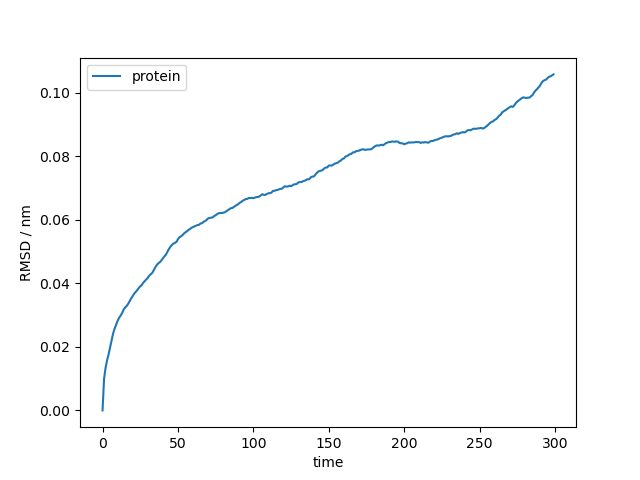

In [5]:
from IPython.display import Image
matches = re.findall(r"fig0_\d+", paths_and_descriptions)
fig_id1 = matches[0]
fig_path1 = registry.get_mapped_path(fig_id1)
assert os.path.exists(fig_path1), f"This figure {fig_id1} does not exist."
Image(filename=fig_path1)

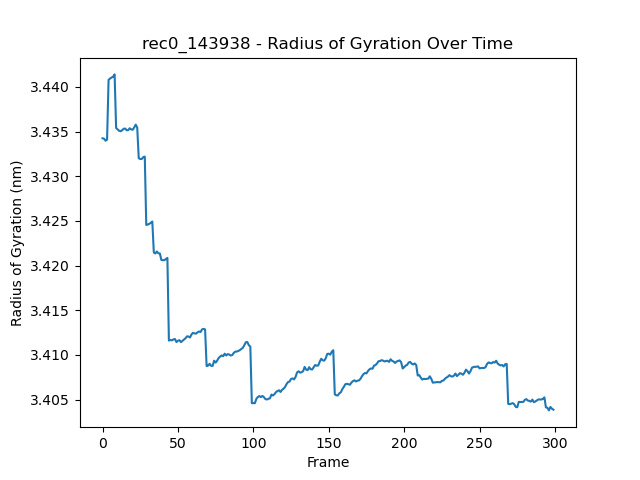

In [6]:
fig_id2 = matches[1]
fig_path2 = registry.get_mapped_path(fig_id2)
assert os.path.exists(fig_path1), f"This figure {fig_id2} does not exist."
Image(filename=fig_path2)

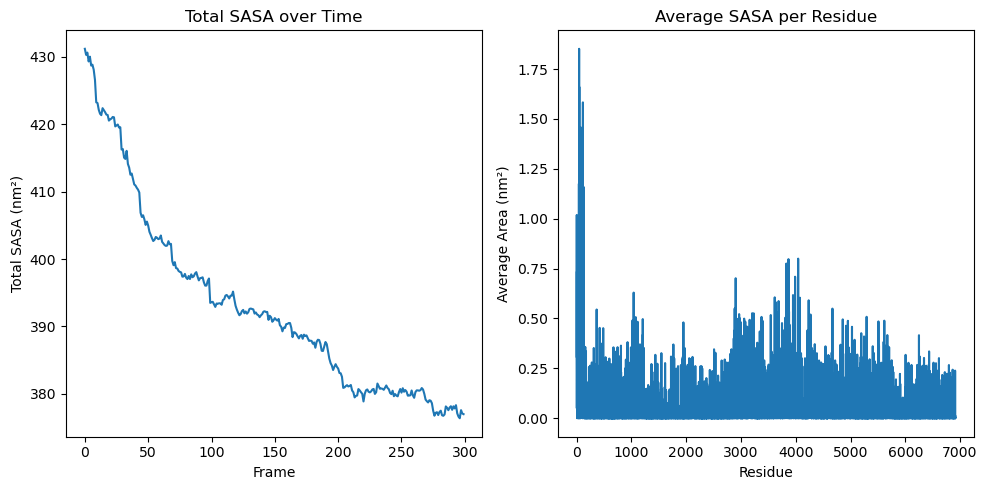

In [7]:
fig_id3 = matches[2]
fig_path3 = registry.get_mapped_path(fig_id3)
assert os.path.exists(fig_path3), f"This figure {fig_id3} does not exist."
Image(filename=fig_path3)

# non-descriptive prompt

In [14]:
agent_2 = MDCrow(agent_type="Structured", model=llm_model, top_k_tools=tools)

In [15]:
agent_2.run(non_descriptive_prompt_7)

Thought: I'll break this down into steps: 1) Download 1LYZ, 2) Get protein info and sites, 3) Run simulation, 4) Analyze structure and simulation results.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```

PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I'll get information about binding and active sites using the UniProt tools. I need to get the UniProt ID first.

Action:
```
{
    "action": "MapProteinRepresentation",
    "action_input": "1LYZ"
}
```

Thought: Let me try a different approach since the UniProt mapping didn't work directly. I'll first run the simulation and analyze the structure, then look up the protein information through a literature search.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_145115",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "save": true,
        "simulation_params": {
            "Ensemble": "NVT",
         

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

 downloading 1LYZ.



Action:
```
{
    

"action": "PDBFileDownloader",


    "action_input": "1L

YZ"
}
```

PDB file found with this ID: 1LYZ


Thought: Now

 that I have the PDB file, I

'll get information about binding

 and active sites. I

'll use GetAllKnownSites

, but first I need to get the Uni

Prot ID and primary accession number.



Action:
```
{
    "

action": "MapProteinRepresentation

",
    "action_input": "1

LYZ"
}
```

Job is running. Retrying in 3s.


Thought: I notice the

 MapProteinRepresentation didn't return results

. Let me try a different approach -

 I'll first set up the simulation while

 I gather protein information. I'll use Set

UpandRunFunction with

 appropriate parameters for a 1 ps simulation

 at 300 K.

Action:


```
{
    "action": "Set

UpandRunFunction",
    "action_

input": {
        "pdb

_id": "1LY

Z_161528",
        

"forcefield_files": ["amber14

-all.xml", "amber14/

tip3pfb.xml"],
        "save

": true,
        "system_params

": {
            "nonbon

dedMethod": "PME",
            "

nonbondedCutoff": "1

.0 * nanometers",


            "constraints": "HBonds",
            

"rigidWater": true,


            "ewaldErrorTolerance

": 0.0005,
            "constra

intTolerance": 0.000

001,
            "s

olvate": true
        },
        "

integrator_params": {
            "integrator

_type": "LangevinMid

dle",
            "Temperature": "

300 * kelvin",
            "

Friction": "1.0 /

 picoseconds",
            "

Timestep": "0.002 * pic

oseconds"
        },
        "simulation

_params": {
            "Ensemble": "NP

T",
            "Number of Steps

": 500,
            "recor

d_interval_steps": 5,
            "recor

d_params": ["step", "potentialEnergy", "

temperature", "density"]
        }
    

}
}
```



Building system...


About to create system...
Attempts at creating system: 0/3


Error adding solvent ValueError – No template found for residue 1 (LYS).  The set of atoms is similar to HID, but it is missing 8 atoms.  For more information, see https://github.com/openmm/openmm/wiki/Frequently-Asked-Questions#template
Residue code: LYS
Residue code not in solvent list. Adding forcefield                         not supported.


Thought: I see the issue -

 we need to clean the PDB file first

 to handle non-standard residues an

d add missing atoms before running the simulation. Let's clean

 the structure first.

Action:


```
{
    "action": "Cl

eaningToolFunction",
    "action

_input": {
        "pdb_

id": "1LY

Z_161528",
        "replace

_nonstandard_residues

": true,
        "ad

d_missing_atoms": true,


        "remove_heterogens": true,


        "remove_water": true,


        "add_hydrogens": true

,
        "add_hydro

gens_ph": 7.0


    }
}
```



file path: /gpfs/fs2/scratch/qcampbe2/repos/md-agent/ckpt/ckpt_76/pdb/1LYZ_raw_20250110_161528.pdb


Thought: Now that we have a clean

 structure, let's try running the simulation again with

 the cleaned file.

Action:
```
{
    

"action": "SetUpandRunFunction",


    "action_input": {
        

"pdb_id": "1LY

Z_161546",
        "forcefiel

d_files": ["amber14-all.xml

", "amber14/tip3pfb.

xml"],
        "save": true,


        "system_params": {
            "

nonbondedMethod": "PME",


            "nonbondedCutoff

": "1.0 * nanometers

",
            "constraints": "HBonds

",
            "rigidWater": true

,
            "ewaldErrorTolerance

": 0.0005,
            "

constraintTolerance": 0.000

001,
            "solvate": true


        },
        "integrator_params

": {
            "integrator_type":

 "LangevinMiddle",
            

"Temperature": "300 * kelvin",


            "Friction": "1.0

 / picoseconds",
            "

Timestep": "0.002 * pic

oseconds"
        },
        "simulation

_params": {
            "Ensemble":

 "NPT",
            "Number of Steps

": 500,
            "record_interval

_steps": 5,
            "recor

d_params": ["step", "potentialEn

ergy", "temperature", "density"]
        

}
    }


}
```

Building system...


About to create system...
Attempts at creating system: 0/3


System built successfully
<openmm.openmm.System; proxy of <Swig Object of type 'OpenMM::System *' at 0x2b7eac379410> >


KeyError: 'Pressure'

In [8]:
registry = agent_2.path_registry
print("ckpt_dir:",os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_dir: ckpt_96
Files found in registry: 1LYZ_145115: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_145115
 1LYZ_145131: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_145135: Initial positions for simulation sim0_145135
 sim0_145135: Basic Simulation of Protein 1LYZ_145131
 rec0_145135: Simulation trajectory for protein 1LYZ_145131 and simulation sim0_145135
 rec1_145135: Simulation state log for protein 1LYZ_145131 and simulation sim0_145135
 rec2_145135: Simulation pdb frames for protein 1LYZ_145131 and simulation sim0_145135
 rec0_145233: dssp values for trajectory with id: rec0_145135
 rmsd_145135: RMSD for 145135
 fig0_145236: RMSD plot for 145135
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_145247: Plot of SASA over time for 1LYZ
 rgy_rec0_145135: Radii of gyration per frame for rec0_145135
 fig0_145250: Plot of radii of gyration over time for r

In [9]:
import re
import os
match = re.search(r"rec0_\d+", paths_and_descriptions)
traj_id = match.group(0)
traj_path = registry.get_mapped_path(traj_id)
match = re.search(r"top_sim0_\d+", paths_and_descriptions)
top_id = match.group(0)
top_path = registry.get_mapped_path(top_id)
assert os.path.exists(traj_path), "Trajectory file doesn't exist"
assert os.path.exists(top_path), "Topology file doesn't exist"
assert traj_path.endswith(".dcd")
assert top_path.endswith(".pdb")
print(f"It's asserted that file paths for {traj_id} and {top_id} exist")

It's asserted that file paths for rec0_145135 and top_sim0_145135 exist


In [18]:
# # this checks DSSP for the first frame, change to the last frame if needed
# import mdtraj as md

# traj_path = registry.get_mapped_path(traj_id)
# top_path = registry.get_mapped_path(top_id)
# traj = md.load(traj_path, top=top_path)[0] # first frame

# secondary_structure = md.compute_dssp(traj,simplified=True)[0]
# print("Number of residues in total: ",traj.n_residues)
# print("Number of chains: ",traj.n_chains)
# print("Number of residues in sheets: ",len([i for i in secondary_structure if i == 'E']))
# print("Number of residues in helices: ",len([i for i in secondary_structure if i == 'H']))
# print("Number of residues in coils: ",len([i for i in secondary_structure if i == 'C']))

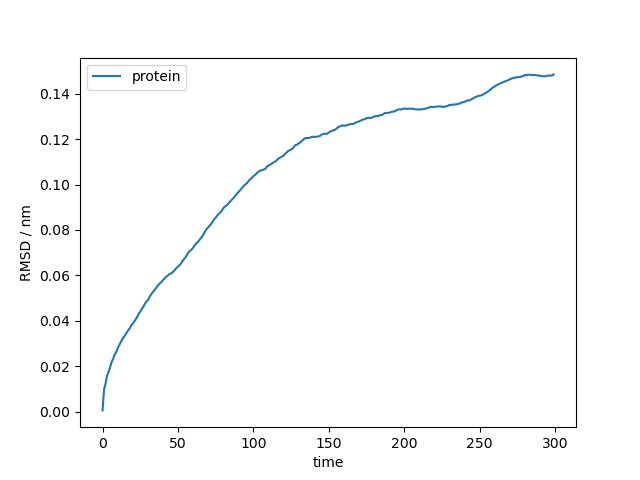

In [10]:
from IPython.display import Image
matches = re.findall(r"fig0_\d+", paths_and_descriptions)
fig_id1 = matches[0]
fig_path1 = registry.get_mapped_path(fig_id1)
assert os.path.exists(fig_path1), f"This figure {fig_id1} does not exist."
Image(filename=fig_path1)

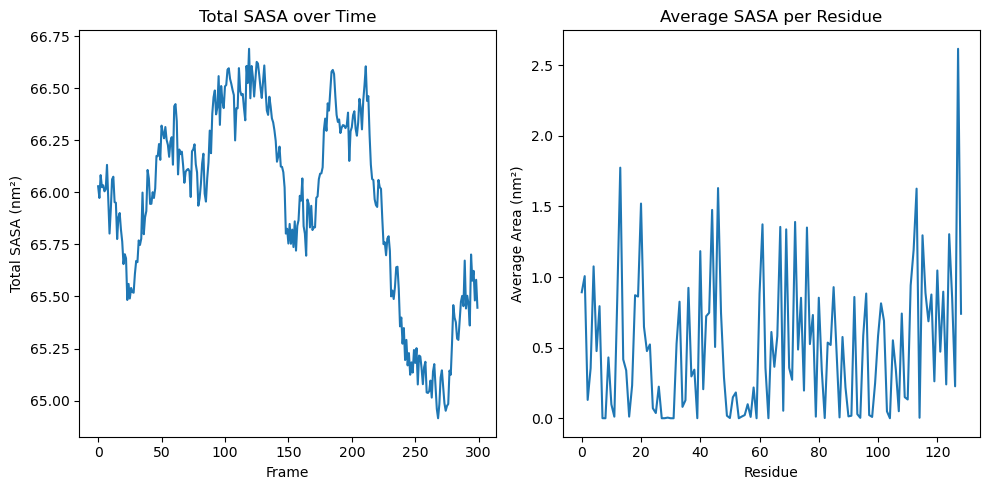

In [11]:
fig_id2 = matches[1]
fig_path2 = registry.get_mapped_path(fig_id2)
assert os.path.exists(fig_path1), f"This figure {fig_id2} does not exist."
Image(filename=fig_path2)

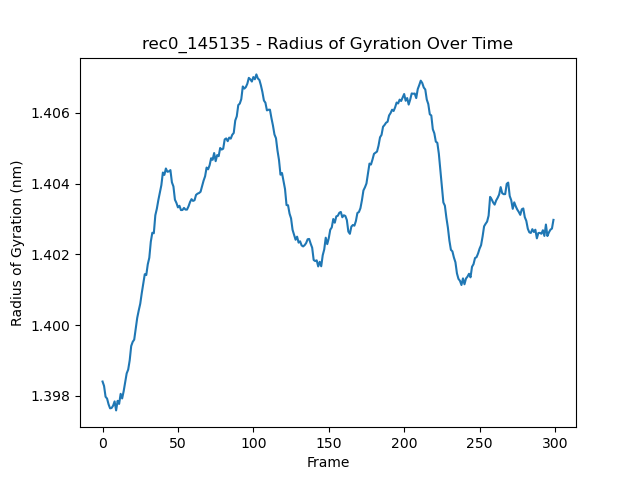

In [12]:
fig_id3 = matches[2]
fig_path3 = registry.get_mapped_path(fig_id3)
assert os.path.exists(fig_path3), f"This figure {fig_id3} does not exist."
Image(filename=fig_path3)